<a href="https://colab.research.google.com/github/dynasty-29/The-Sparks-Foundation/blob/main/Predicting_student_score_based_on_study_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Supervised ML**

● Predict the percentage of an student based on the no. of study hours.
● This is a simple linear regression task as it involves just 2 variables.


In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# loading data set
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [22]:
# previewing data set
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# shape
df.shape

(25, 2)

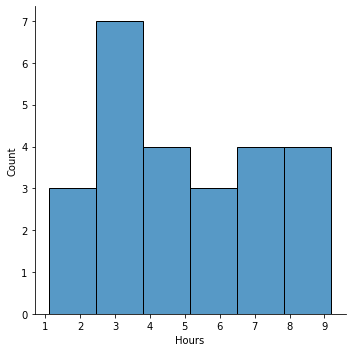

In [6]:
#Previewing hours distribution
sns.displot(df, x="Hours")

Most frequent hours is 3 hours

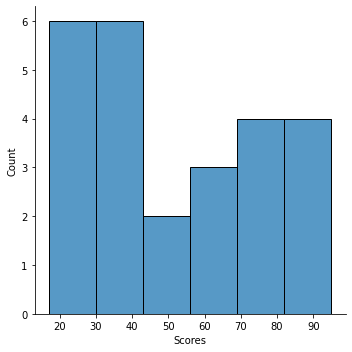

In [7]:
#Previewing Scores distribution
sns.displot(df, x="Scores")

# **Modelling**

Aim is to create a model that can be used to predict student score depending on hours spend studying


In [8]:

# from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [15]:

#creating a list that will track rmses
rmses = []

In [9]:
#separating features and target for use in modelling

X = df.drop(['Scores'], axis=1)

y = df['Scores']

In [10]:
# Splitting dataset to train and test sets 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [11]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#predicting on unseen data
y_pred = model.predict(X_test)


import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append((f'Baseline linear model RMSE: {rmse}'))

In [17]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [18]:
rmses

['Baseline linear model RMSE: 4.647447612100373']

In [21]:
#predicting student score if a student studies for 9.25 hrs/ day? 
x_new = np.array([9.25]).reshape(-1, 1)
y_pred = model.predict(x_new)
print(y_pred)

[93.69173249]


the student scores around 93.6